In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Data File
df = pd.read_csv('/content/Customer Churn.csv')


In [ ]:
#Checking the Total Columns and Rows in the Data set
df.shape



In [ ]:
#Understanding the Basic Statistics about the data
df.describe()

In [ ]:
#Checking the first 5 rows and columns of the data
df.head()

In [ ]:
#Checking the data types
df.info()

In [6]:
#Checking for null values

# Count of null values in a particular column
null_count = df['TotalCharges'].isnull().sum()
print(f"Number of null values in column_name: {null_count}")

#Checking Null values in the complete data set
df.isnull().sum().sum()

Number of null values in column_name: 0


0

In [7]:
#Converting the data type of required column for further visualization
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype(float)

#Checking data type after conversion
print(df['TotalCharges'].dtype)


float64


In [ ]:
#Checking for Duplicate values as well.
df.duplicated().sum()

In [ ]:
#Converting int type data to str type by creating a function that can be used later as well
def conv(value):
  if value == 1:
    return 'Yes'
  else:
    return 'No'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#Checking data type after conversion
print(df['SeniorCitizen'].dtype)


Now the data is ready for further Analysis as all the possible null values are handled and required datatypes are converted for EDA

# Total count and percentages of customer who churned vs not churned.

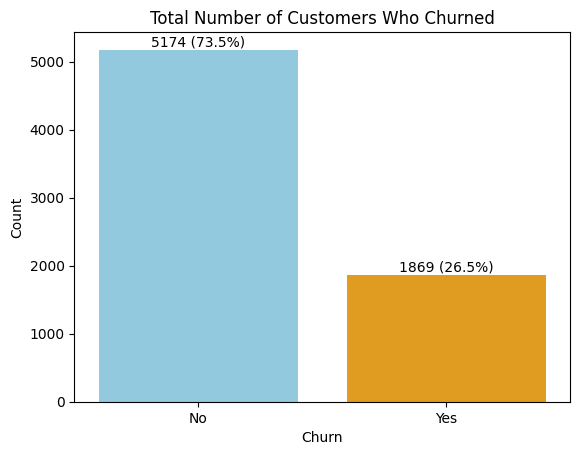

In [15]:
# Plot with custom colors
ax = sns.countplot(x='Churn', data=df, palette=['skyblue', 'orange'])  # Customize colors here

# Total rows for percentage calculation
total = len(df)

# Add counts and percentages to each bar
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{int(bar.get_height())} ({(bar.get_height() / total) * 100:.1f}%)' for bar in container]
    )
plt.title("Total Number of Customers Who Churned")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


# Churn pattern across different demographic features

In [ ]:
# Create a count plot to visualize gender with respect to churn
ax = sns.countplot(x='gender', hue='Churn', data=df, palette=['skyblue', 'orange'])

# Add labels to bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Add title and labels
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Churn by Partner

In [ ]:
partner_churn = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack() * 100
partner_churn.plot(kind='bar', stacked=True, figsize=(6, 4), title='Churn by Partner')
plt.ylabel('Percentage')
plt.show()

summary = df.groupby('Partner')['Churn']
print(summary.value_counts())

Churn by Dependants

In [ ]:
# Churn by Dependents
dependents_churn = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack() * 100
dependents_churn.plot(kind='bar', stacked=True, figsize=(6, 4), title='Churn by Dependents')
plt.ylabel('Percentage')
plt.show()

Summary  = df.groupby('Dependents')['Churn']
print(Summary.value_counts())

Churn by Senior citizen

In [ ]:
# Calculate churn percentages by Senior Citizen
senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn by Senior Citizen with separate bars
senior_churn.plot(kind='bar', figsize=(6, 4), title='Churn by Senior Citizen', rot=0)

# Label axes and add percentages on the bars
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.xticks(ticks=[0, 1], labels=['Non-Senior', 'Senior'])
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

summary = df.groupby('SeniorCitizen')['Churn']
print(summary.value_counts())

Service Usage:

    Churn patterns across services (e.g., InternetService, StreamingTV).
    Impact of add-ons like TechSupport, OnlineSecurity on churn.

In [ ]:
# Churn by Internet Service
internet_service_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn by Internet Service
internet_service_churn.plot(kind='bar', figsize=(6, 4), title='Churn by Internet Service', rot=0)

# Add labels
plt.ylabel('Percentage')
plt.xlabel('Internet Service')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Summary = df.groupby('InternetService')['Churn']
print(Summary.value_counts())

Churn by Streaming TV service

In [ ]:
# Churn by StreamingTV
streaming_tv_churn = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn by StreamingTV
streaming_tv_churn.plot(kind='bar', figsize=(6, 4), title='Churn by StreamingTV', rot=0)

# Add labels
plt.ylabel('Percentage')
plt.xlabel('StreamingTV')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

summary = df.groupby('StreamingTV')['Churn']
print(summary.value_counts())

Impact on Churn by addins like Tech Support and Online Security

In [ ]:
# Churn by TechSupport
tech_support_churn = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn by TechSupport
tech_support_churn.plot(kind='bar', figsize=(6, 4), title='Churn by TechSupport', rot=0)

# Add labels
plt.ylabel('Percentage')
plt.xlabel('TechSupport')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

summary = df.groupby('TechSupport')['Churn']
print(summary.value_counts())


In [ ]:
# Churn by OnlineSecurity
online_security_churn = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn by OnlineSecurity with separate bars
ax = online_security_churn.plot(kind='bar', figsize=(6, 4), title='Churn by OnlineSecurity', rot=0)

# Add percentages to the bars
for index, values in enumerate(online_security_churn.values):
    ax.text(index - 0.15, values[0] / 2, f'{values[0]:.1f}%', ha='center', color='black')
    ax.text(index + 0.15, 50 + values[1] / 2, f'{values[1]:.1f}%', ha='center', color='black')

# Add axis labels
plt.ylabel('Percentage')
plt.xlabel('OnlineSecurity')
plt.xticks(ticks=[0, 1, 2], labels=['No', 'Yes', 'No Internet Service'])
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


Diving Deeper into some more important factors that are leading to customer churn

# Impact of Contract Type on Customer Churn

In [ ]:
# Churn by Contract Type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn by Contract
ax = contract_churn.plot(kind='bar', figsize=(6, 4), title='Churn by Contract', rot=0)

# Add percentages inside the bars
for index, values in enumerate(contract_churn.values):
    ax.text(index - 0.25, values[0] / 2, f'{values[0]:.1f}%', ha='center', va='center', color='Black')
    ax.text(index + 0.25, values[0] + (values[1] / 2), f'{values[1]:.1f}%', ha='center', va='center', color='Black')

# Add axis labels
plt.ylabel('Percentage')
plt.xlabel('Contract Type')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


# Impact of Billing Type and Payment Method on Customer Churn Rate


In [ ]:
# Churn by Payment Method
payment_method_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn by Payment Method
payment_method_churn.plot(kind='bar', figsize=(8, 5), title='Churn by Payment Method', rot=30)

# Add axis labels
plt.ylabel('Percentage')
plt.xlabel('Payment Method')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()  # Ensure layout fits properly
plt.show()

summary = df.groupby('PaymentMethod')['Churn']
print(summary.value_counts())

Impact of Paperless Billing on Churn

In [ ]:
# Churn by Paperless Billing
paperless_churn = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn by Paperless Billing
paperless_churn.plot(kind='bar', figsize=(6, 4), title='Churn by Paperless Billing', rot=0)

# Add axis labels
plt.ylabel('Percentage')
plt.xlabel('Paperless Billing')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

summary = df.groupby('PaperlessBilling')['Churn']
print(summary.value_counts())


# Impact of Financial Metrics on customer churn rate

Monthly Charges Churn Rate

In [ ]:
# Box plot for MonthlyCharges by Churn status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.ylabel('Monthly Charges')
plt.xlabel('Churn')
plt.show()

# Summary statistics for MonthlyCharges
monthly_charges_stats = df.groupby('Churn')['MonthlyCharges'].describe()
print(monthly_charges_stats)


Churn rate by total Charges

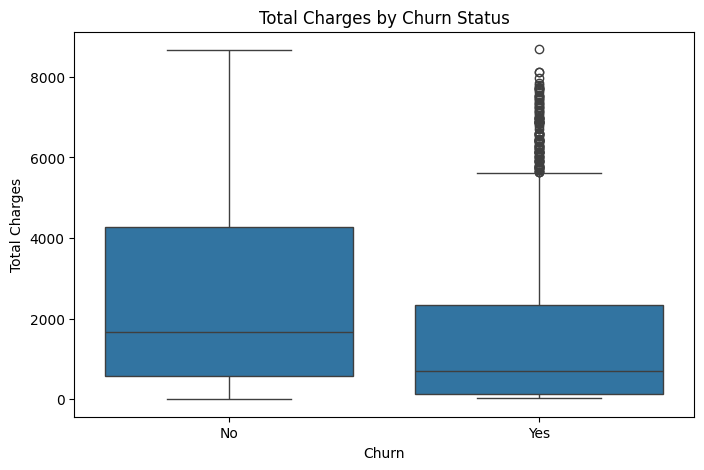

        count         mean          std    min    25%       50%      75%  \
Churn                                                                      
No     5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
Yes    1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

           max  
Churn           
No     8672.45  
Yes    8684.80  


In [9]:
# Box plot for TotalCharges by Churn status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn Status')
plt.ylabel('Total Charges')
plt.xlabel('Churn')
plt.show()

# Summary statistics for TotalCharges
total_charges_stats = df.groupby('Churn')['TotalCharges'].describe()
print(total_charges_stats)


# Impact of tenure on Churn Rate

In [ ]:
# Histogram for tenure by churn status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=False, bins=20, multiple='stack')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


Tenure Segmentation Analysis on Churn Rate

In [ ]:
# Define tenure segments
bins = [0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61+']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# Churn rates by tenure group
tenure_group_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn rates by tenure group
tenure_group_churn.plot(kind='bar', stacked=True, figsize=(10, 6), title='Churn Rates by Tenure Group')
plt.ylabel('Percentage')
plt.xlabel('Tenure Group (Months)')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# Analyizng Multiple factors leading to increase in the Customer Churn Rate

Churn by Monthly Charges and Contract Type

In [ ]:
# Box plot for MonthlyCharges by Churn and Contract
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract and Churn Status')
plt.ylabel('Monthly Charges')
plt.xlabel('Contract')
plt.legend(title='Churn')
plt.show()

# Box plot for TotalCharges by Churn and Contract
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn', data=df)
plt.title('Total Charges by Contract and Churn Status')
plt.ylabel('Total Charges')
plt.xlabel('Contract')
plt.legend(title='Churn')
plt.show()


# Impact of Tenure and Contract Type on Churn Rate

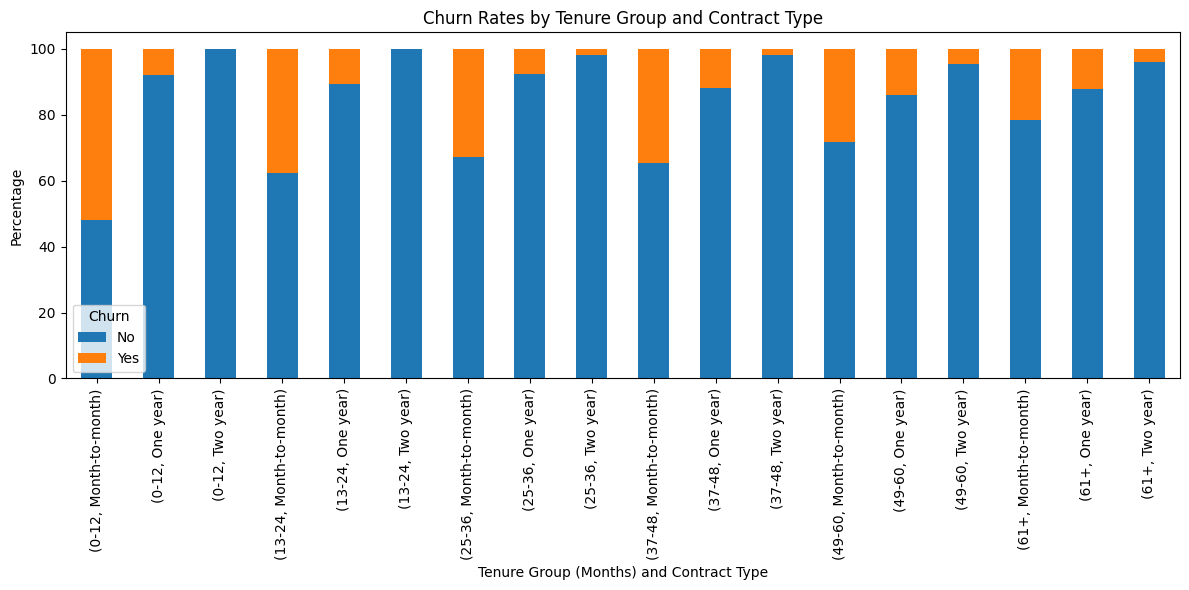

In [31]:
# Group data by tenure group and contract type, then calculate churn rates
tenure_contract_churn = df.groupby(['tenure_group', 'Contract'])['Churn'].value_counts(normalize=True).unstack() * 100

# Plot churn rates
tenure_contract_churn.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn Rates by Tenure Group and Contract Type')
plt.ylabel('Percentage')
plt.xlabel('Tenure Group (Months) and Contract Type')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
